In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/laptop_price.csv", encoding="ISO-8859-1")

In [3]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [5]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

## Dropping Unnecessary Columns
Remove columns that are not needed for analysis, such as 'laptop_ID' and 'Product'.

In [6]:
df = df.drop(['laptop_ID','Product'],axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Converting RAM to Numeric
Transform the 'Ram' column from string format (e.g., '8GB') to integer values for analysis.

In [7]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
df['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: int64

## Converting Weight to Numeric
Change the 'Weight' column from string format (e.g., '2.2kg') to float values for further processing.

In [8]:
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)
df['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

In [9]:
df['SSD'] = 0
df['HDD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0

import re

# Function to convert memory strings to numbers.
def convert_memory(mem):
    mem = str(mem)
    ssd = hdd = hybrid = flash = 0  # Start with 0 for all storage types

    # Split by '+'
    parts = mem.split('+')
    for part in parts:
        part = part.strip()

        # Extract numeric size
        size_match = re.search(r'(\d+)', part)
        mem_size = int(size_match.group(1)) if size_match else 0

        # Convert TB → GB
        if "TB" in part:
            mem_size *= 1024

        # Assign to storage type
        if "SSD" in part:
            ssd += mem_size
        elif "HDD" in part:
            hdd += mem_size
        elif "Hybrid" in part:
            hybrid += mem_size
        elif "Flash" in part or "Flash Storage" in part:
            flash += mem_size

    return pd.Series([ssd, hdd, hybrid, flash])

# Apply function
df[['SSD', 'HDD', 'Hybrid', 'Flash_Storage']] = df['Memory'].apply(convert_memory)
df = df.drop('Memory', axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0


## Splitting CPU Brand and Speed
Extract CPU brand and speed (in GHz) from the 'Cpu' column into separate features.

In [10]:

import re

def split_cpu(cpu):
    cpu = str(cpu)

    match = re.search(r'(\d+(\.\d+)?)GHz', cpu)
    if match:
        speed = float(match.group(1)) 
        brand = cpu.replace(match.group(0), '').strip()  
    else:
        speed = None
        brand = cpu
    return pd.Series([brand, speed])


df[['Cpu_brand', 'Cpu_speed']] = df['Cpu'].apply(split_cpu)


df = df.drop('Cpu', axis=1)

df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1


## Ensuring 'Price_euros' Column is Numeric
Convert the 'Price_euros' column to numeric type and remove any rows with invalid or missing values.

In [11]:
df['Price_euros'] = pd.to_numeric(df['Price_euros'], errors='coerce')
df = df.dropna()
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1


## Visualizing the Distribution of Laptop Prices
Plot the distribution of laptop prices to understand the spread and identify any outliers.

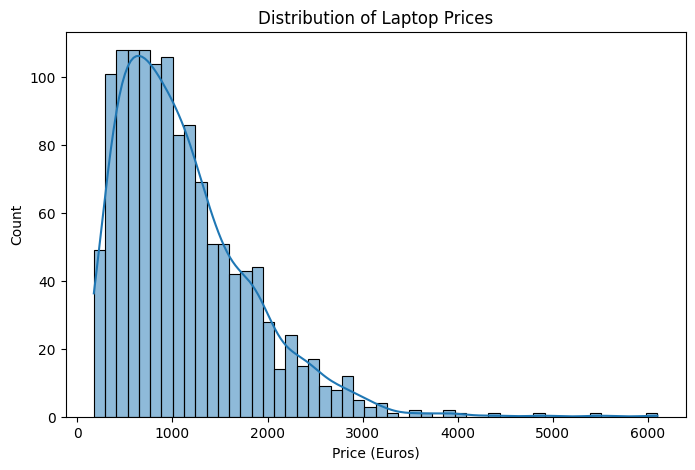

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=50, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

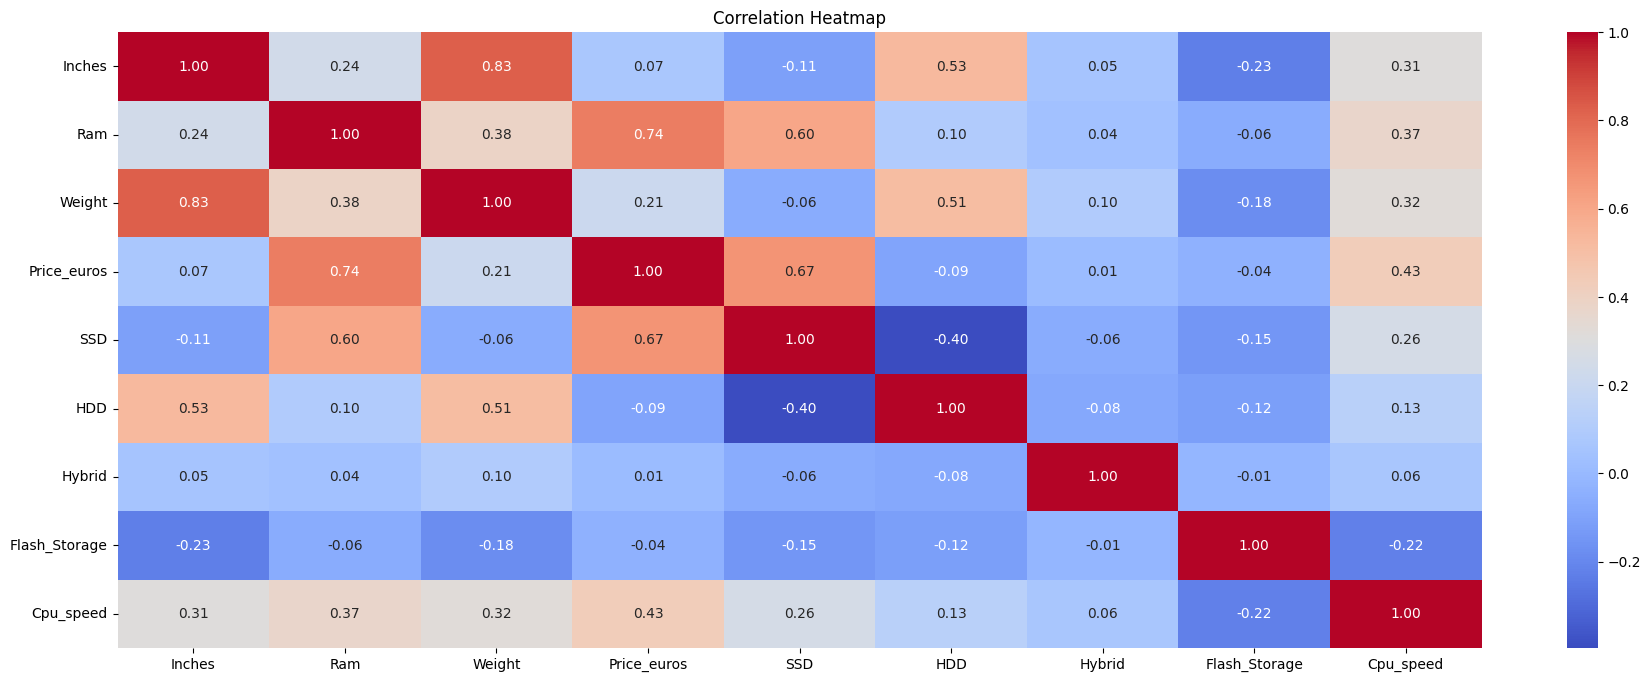

In [13]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

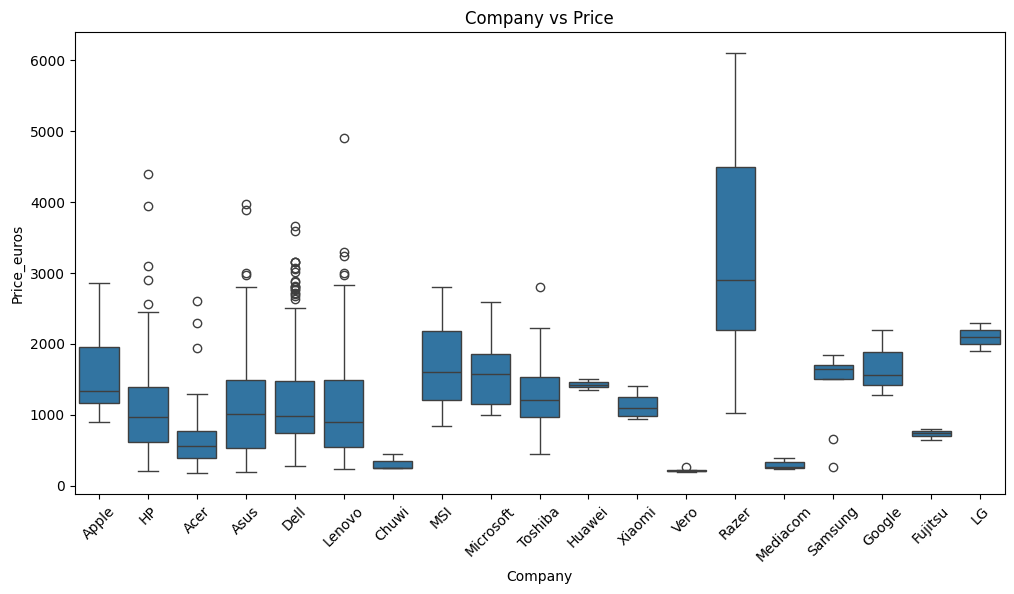

In [14]:
# 4. Boxplots: Categorical Features vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x="Company", y="Price_euros", data=df)
plt.title("Company vs Price")
plt.xticks(rotation=45)
plt.show()

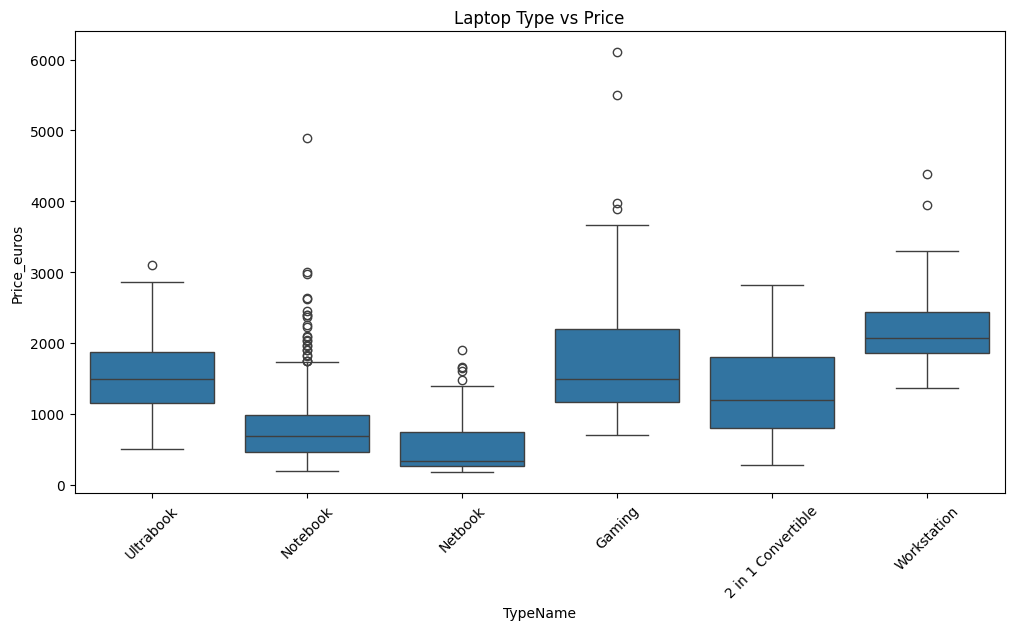

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="TypeName", y="Price_euros", data=df)
plt.xticks(rotation=45)
plt.title("Laptop Type vs Price")
plt.show()

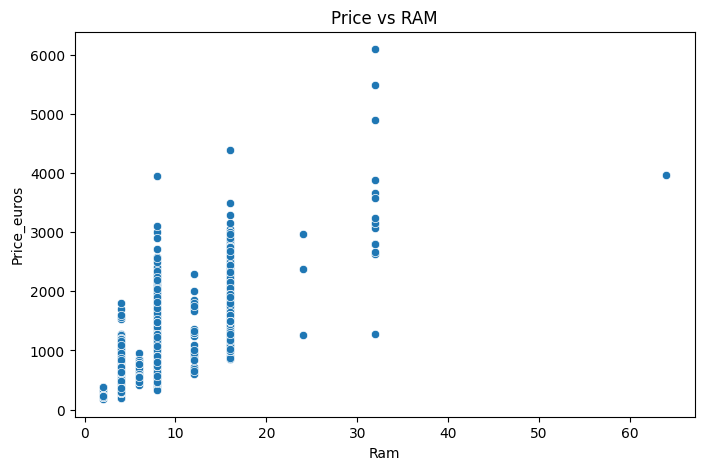

In [16]:
# Price vs RAM size
plt.figure(figsize=(8,5))
sns.scatterplot(x="Ram", y="Price_euros", data=df)
plt.title("Price vs RAM")
plt.show()

## Feature Engineering
Create new features such as price per inch to enhance the dataset for modeling.

In [17]:

#  Price per Inch 
df['price_per_inch'] = df['Price_euros'] / df['Inches']


df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,price_per_inch
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3,100.728571
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8,67.589474
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5,36.858974
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7,164.769481
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1,135.609023


In [19]:
df.to_csv("../dataset/aptops_cleaned.csv", index=False)